#                 Capstone Project - Eye for blind - Visalakshi G

**Problem statement**<BR>
This project is to create a deep learning model which can explain the contents of an image in the form of speech through caption generation with an attention mechanism on Flickr8K dataset. This kind of model is a use-case for blind people so that they can understand any image with the help of speech. The caption generated through a CNN-RNN model will be converted to speech using a text to speech library. 

**Approach** <BR>
An application is created using both deep learning and natural language processing. The features of an image will be extracted by a CNN-based encoder and this will be decoded by an RNN model.
The dataset is taken from the Kaggle website and it consists of sentence-based image descriptions having a list of 8,000 images that are each paired with five different captions which provide clear descriptions of the salient entities and events of the image.<BR><BR>
Major steps and breif description of steps in the process are as below.
- Data Understanding - Load the data and understand the representation.
- Data Preprocessing - Process both images and captions to the desired format.
- Train-Test Split - Combine both images and captions to create the train and test dataset.
- Model Building: Create your image captioning model by building Encoder, Attention and Decoder model.
- Model Evaluation: Evaluate the models using greedy search and BLEU score.


### Image files location and reading files

In [64]:

import os

# Input data files are available in the read-only ".\Flickr8K\Images\" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

f=".\Flickr8K\Images"

dir_path = os.path.dirname(os.path.realpath(f))   #Find file location

print('\033[1m'+'Application Dataset file location on local machine: '+dir_path) #write dataset location

import os
for dirname, _, filenames in os.walk(dir_path):
    for filename in filenames:
        print(os.path.join(dirname, filename))


Application Dataset file location on local machine: /mnt/disks/user/project/Eye for blind
/mnt/disks/user/project/Eye for blind/Eye for blind Starter code.ipynb
/mnt/disks/user/project/Eye for blind/EyeForBlind.ipynb
/mnt/disks/user/project/Eye for blind/Predicted_text.mp3
/mnt/disks/user/project/Eye for blind/Flickr8K.zip
/mnt/disks/user/project/Eye for blind/.\Flickr8k\File4/ckpt-15.data-00001-of-00002
/mnt/disks/user/project/Eye for blind/.\Flickr8k\File4/ckpt-8.data-00000-of-00002
/mnt/disks/user/project/Eye for blind/.\Flickr8k\File4/ckpt-1.data-00000-of-00002
/mnt/disks/user/project/Eye for blind/.\Flickr8k\File4/ckpt-11.data-00001-of-00002
/mnt/disks/user/project/Eye for blind/.\Flickr8k\File4/ckpt-3.index
/mnt/disks/user/project/Eye for blind/.\Flickr8k\File4/ckpt-7.data-00001-of-00002
/mnt/disks/user/project/Eye for blind/.\Flickr8k\File4/ckpt-14.data-00001-of-00002
/mnt/disks/user/project/Eye for blind/.\Flickr8k\File4/ckpt-5.index
/mnt/disks/user/project/Eye for blind/.\Flic

/mnt/disks/user/project/Eye for blind/Flickr8K/Images/236476706_175081ce18.jpg
/mnt/disks/user/project/Eye for blind/Flickr8K/Images/2730819220_b58af1119a.jpg
/mnt/disks/user/project/Eye for blind/Flickr8K/Images/2429978680_1e18a13835.jpg
/mnt/disks/user/project/Eye for blind/Flickr8K/Images/189721896_1ffe76d89e.jpg
/mnt/disks/user/project/Eye for blind/Flickr8K/Images/2533010184_ef2fd71297.jpg
/mnt/disks/user/project/Eye for blind/Flickr8K/Images/190638179_be9da86589.jpg
/mnt/disks/user/project/Eye for blind/Flickr8K/Images/2497074804_b4f3e7fd90.jpg
/mnt/disks/user/project/Eye for blind/Flickr8K/Images/2860040276_eac0aca4fc.jpg
/mnt/disks/user/project/Eye for blind/Flickr8K/Images/2616643090_4f2d2d1a44.jpg
/mnt/disks/user/project/Eye for blind/Flickr8K/Images/642987597_03b21a1437.jpg
/mnt/disks/user/project/Eye for blind/Flickr8K/Images/3005872315_e6771763bd.jpg
/mnt/disks/user/project/Eye for blind/Flickr8K/Images/3522989916_f20319cc59.jpg
/mnt/disks/user/project/Eye for blind/Flickr

/mnt/disks/user/project/Eye for blind/Flickr8K/Images/3339319023_5dcc3ef81a.jpg
/mnt/disks/user/project/Eye for blind/Flickr8K/Images/3551281733_b43bf6f870.jpg
/mnt/disks/user/project/Eye for blind/Flickr8K/Images/3393926562_66cc01b001.jpg
/mnt/disks/user/project/Eye for blind/Flickr8K/Images/3127142756_bf0bfcb571.jpg
/mnt/disks/user/project/Eye for blind/Flickr8K/Images/103205630_682ca7285b.jpg
/mnt/disks/user/project/Eye for blind/Flickr8K/Images/3352697012_751b079bbb.jpg
/mnt/disks/user/project/Eye for blind/Flickr8K/Images/1463732807_0cdf4f22c7.jpg
/mnt/disks/user/project/Eye for blind/Flickr8K/Images/392976422_c8d0514bc3.jpg
/mnt/disks/user/project/Eye for blind/Flickr8K/Images/436608339_f1d1298770.jpg
/mnt/disks/user/project/Eye for blind/Flickr8K/Images/2929405404_1dff5ab847.jpg
/mnt/disks/user/project/Eye for blind/Flickr8K/Images/3234890865_bb3c316968.jpg
/mnt/disks/user/project/Eye for blind/Flickr8K/Images/2866686547_0a67eb899d.jpg
/mnt/disks/user/project/Eye for blind/Flick

/mnt/disks/user/project/Eye for blind/Flickr8K/Images/315125146_d9a8e60061.jpg
/mnt/disks/user/project/Eye for blind/Flickr8K/Images/3052196390_c59dd24ca8.jpg
/mnt/disks/user/project/Eye for blind/Flickr8K/Images/566446626_9793890f95.jpg
/mnt/disks/user/project/Eye for blind/Flickr8K/Images/2751567262_e089b33ed9.jpg
/mnt/disks/user/project/Eye for blind/Flickr8K/Images/2518094853_dfce24ce8c.jpg
/mnt/disks/user/project/Eye for blind/Flickr8K/Images/3436395540_63bc8f2fe0.jpg
/mnt/disks/user/project/Eye for blind/Flickr8K/Images/3358558292_6ab14193ed.jpg
/mnt/disks/user/project/Eye for blind/Flickr8K/Images/2680990587_eee6bd04fb.jpg
/mnt/disks/user/project/Eye for blind/Flickr8K/Images/241346508_0b3907a95b.jpg
/mnt/disks/user/project/Eye for blind/Flickr8K/Images/2938072630_d641b63e4d.jpg
/mnt/disks/user/project/Eye for blind/Flickr8K/Images/3569755200_cef7ee2233.jpg
/mnt/disks/user/project/Eye for blind/Flickr8K/Images/2451285022_59255e7fd9.jpg
/mnt/disks/user/project/Eye for blind/Flick

**Import Required Libraries**

In [65]:
import glob


import pandas as pd
print('pandas version\t:',pd.__version__)
import numpy as np
print('numpy version\t:',np.__version__)
from functools import reduce
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
import time

from PIL import Image
from IPython.display import display
from PIL import ImageFont
from PIL import ImageDraw
from pickle import dump,load


from keras.preprocessing.text import Tokenizer
import tensorflow as tf
from tensorflow import keras
print('keras version\t:',keras.__version__)
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

from nltk.corpus import stopwords
from keras.preprocessing import sequence
from keras.models import Sequential
from tensorflow.keras.layers import LSTM, Embedding, TimeDistributed, Dense, RepeatVector,\
                         Activation, Flatten, Reshape, concatenate, Dropout, BatchNormalization, Conv2D
from keras.optimizers import Adam, RMSprop
from keras.layers.wrappers import Bidirectional
from keras.layers.merge import add
from keras.applications.inception_v3 import InceptionV3
from keras.preprocessing import image
#from keras.models import Model
from tensorflow.keras.models import Model, load_model
from tensorflow.keras import Input, layers
from tensorflow.keras import optimizers
from keras.applications.inception_v3 import preprocess_input
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from tqdm import tqdm

import warnings
warnings.filterwarnings("ignore")


pandas version	: 0.25.0
numpy version	: 1.16.1
keras version	: 2.3.0-tf


### Understand the dataset
- Read the dataset
- View a sample image and caption present in the dataset

In [66]:
image_dir="/mnt/disks/user/project/Eye for blind/Flickr8K/Images/"
imgs = glob.glob(image_dir + '/*.jpg',recursive=True)
print("The total images present in the dataset: {}".format(len(imgs)))

The total images present in the dataset: 8091


### Visualize the images read

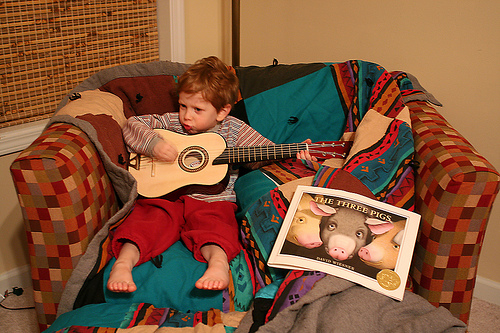

In [67]:
Image.open(imgs[0])

#### Define caption file and functions to read image captions and captions txt file

In [68]:
text_file="/mnt/disks/user/project/Eye for blind/Flickr8K/captions.txt"

def get_img_ids_and_captions(text):
    keys=[]
    values=[]
    key_paths=[]
    text=text.splitlines()[1:]
    for line in text:
        com_idx=line.index(",")
        im_id,im_cap=line[:com_idx],line[com_idx+1:]
        keys.append(im_id)
        values.append(im_cap)
        key_paths.append(image_dir+'/'+im_id)
    return keys,values,key_paths

def load_doc(filename):    
    text=open(filename).read()
    return text

In [69]:
#Read the text file into seperate variable

In [70]:
doc = load_doc(text_file)
print(doc[:300], "........")

image,caption
1000268201_693b08cb0e.jpg,A child in a pink dress is climbing up a set of stairs in an entry way .
1000268201_693b08cb0e.jpg,A girl going into a wooden building .
1000268201_693b08cb0e.jpg,A little girl climbing into a wooden playhouse .
1000268201_693b08cb0e.jpg,A little girl climbing ........


### Data Preprocessing
**Create a dataframe which summarizes the image, path & captions as a dataframe**


In [71]:
all_img_id,annotations,all_img_vector= get_img_ids_and_captions(doc)#store all the image id here


df = pd.DataFrame(list(zip(all_img_id, all_img_vector,annotations)),columns =['ID','Path', 'Captions']) 
    
df.head()

ID  \
0  1000268201_693b08cb0e.jpg   
1  1000268201_693b08cb0e.jpg   
2  1000268201_693b08cb0e.jpg   
3  1000268201_693b08cb0e.jpg   
4  1000268201_693b08cb0e.jpg   

                                                Path  \
0  /mnt/disks/user/project/Eye for blind/Flickr8K...   
1  /mnt/disks/user/project/Eye for blind/Flickr8K...   
2  /mnt/disks/user/project/Eye for blind/Flickr8K...   
3  /mnt/disks/user/project/Eye for blind/Flickr8K...   
4  /mnt/disks/user/project/Eye for blind/Flickr8K...   

                                            Captions  
0  A child in a pink dress is climbing up a set o...  
1              A girl going into a wooden building .  
2   A little girl climbing into a wooden playhouse .  
3  A little girl climbing the stairs to her playh...  
4  A little girl in a pink dress going into a woo...

In [72]:
#Each image id has 5 captions associated with it therefore the total dataset should have 40455 samples.
print(len(df))

40455


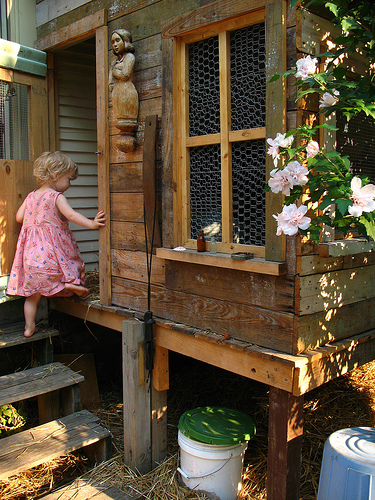

In [73]:
Image.open(all_img_vector[0])

In [74]:
#Create the vocabulary & the counter for the captions
def voc_fetcher(frame,column):
    out=[]
    for i in frame[column]:
        out+=i.split(" ")
    return out


vocabulary=voc_fetcher(df,"Captions")
val_count=Counter(vocabulary)
print(val_count)

Counter({'a': 40271, '.': 34212, 'A': 21481, 'in': 18961, 'the': 15328, 'on': 10729, 'is': 9345, 'and': 8850, 'dog': 7982, 'with': 7760, 'man': 6828, 'of': 6712, 'Two': 3962, 'white': 3875, 'black': 3696, 'are': 3503, 'boy': 3442, 'woman': 3227, 'girl': 3217, ',': 3210, 'to': 3173, 'wearing': 3061, 'The': 2920, 'at': 2904, 'water': 2774, 'red': 2660, 'brown': 2475, 'people': 2442, 'young': 2431, '."': 2365, 'his': 2357, 'blue': 2257, 'dogs': 2082, 'running': 2072, 'through': 2031, 'playing': 2008, 'while': 1957, 'an': 1944, 'down': 1823, 'shirt': 1803, 'standing': 1786, 'ball': 1778, 'little': 1625, 'grass': 1621, 'snow': 1481, 'child': 1477, 'jumping': 1469, 'over': 1414, 'person': 1414, 'front': 1386, 'sitting': 1368, 'holding': 1324, 'field': 1276, 'two': 1262, 'up': 1260, 'by': 1248, 'green': 1218, 'small': 1207, 'yellow': 1207, 'large': 1191, '"A': 1186, 'her': 1178, 'group': 1172, 'walking': 1165, 'into': 1074, 'air': 1057, 'beach': 1044, 'men': 1035, 'near': 1022, 'one': 1007, '

#### Function to visualise the top 30 occuring words in the captions and display the result

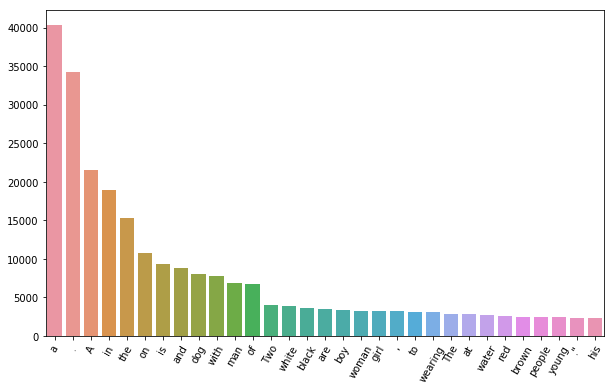

In [75]:
def get_top_words_based_on_cnt(words_dict,n_words):
    n_words+=1
    keys=list(words_dict.keys())
    values=list(words_dict.values())
    sorted_values=sorted(values,reverse=True)[:n_words]
    sorted_keys=[]
    for i in sorted_values:
        if sorted_values.count(i)==1:
            sorted_keys.append(keys[values.index(i)])
        elif sorted_values.count(i)==2:
            f_idx=values.index(i)
            s_idx=values[f_idx+1:].index(i)
            s_idx+=f_idx+1
            a,b=keys[f_idx],keys[s_idx]
            if a not in sorted_keys and b not in sorted_keys:
                sorted_keys.append(a)
                sorted_keys.append(b)
    plt.figure(figsize=(10,6))
    sns.barplot(x=sorted_keys,y=sorted_values)
    plt.xticks(rotation=60)
    plt.show()
    #write your code here
get_top_words_based_on_cnt(val_count,30)

#### Create a list which contains all the captions & path

In [76]:
#Create a list which contains all the captions

annotations=df.Captions.apply(lambda z:"<start>"+" "+z+" "+"<end>")

#add the <start> & <end> token to all those captions as well
#Create a list which contains all the path to the images

all_img_path=df.Path.to_list()
print("Total captions present in the dataset: "+ str(len(annotations)))
print("Total images present in the dataset: " + str(len(all_img_path)))

Total captions present in the dataset: 40455
Total images present in the dataset: 40455


#### Function to display image and caption

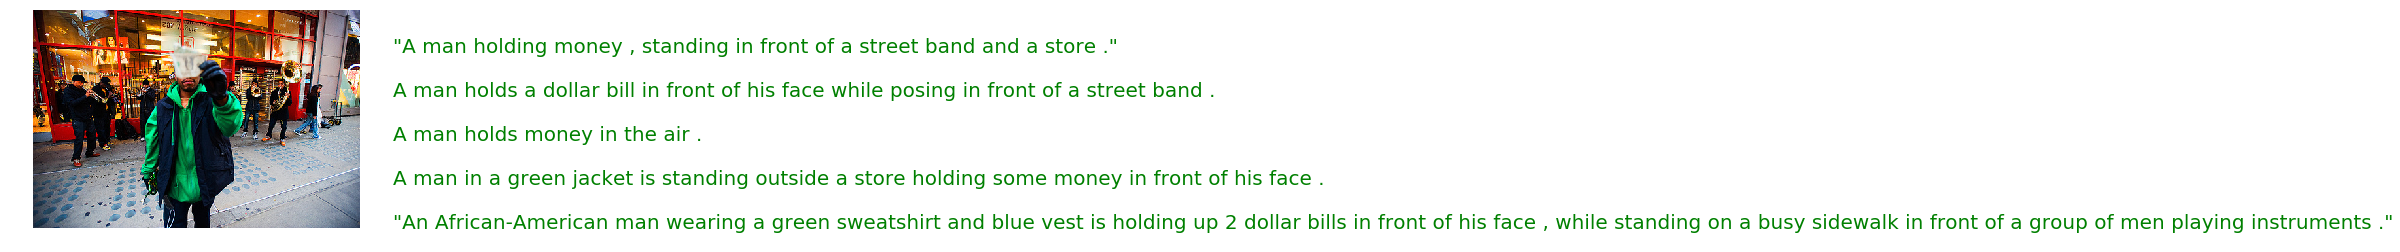

In [77]:
def caption_and_image_plotter(image_id,frame):
    #get captions
    caps=("\n"*2).join(frame[frame['ID']==image_id].Captions.to_list())
    fig, ax = plt.subplots()
    ax.set_axis_off()
    idx=df.ID.to_list().index(image_id)
    im=Image.open(df.Path.iloc[idx])
    w,h=im.size[0],im.size[-1]
    ax.imshow(im)
    ax.text(w+50,h,caps,fontsize=20,color='green')
caption_and_image_plotter(df.ID.iloc[8049],df)

#### Function to display image and caption for a given range in the dataframe

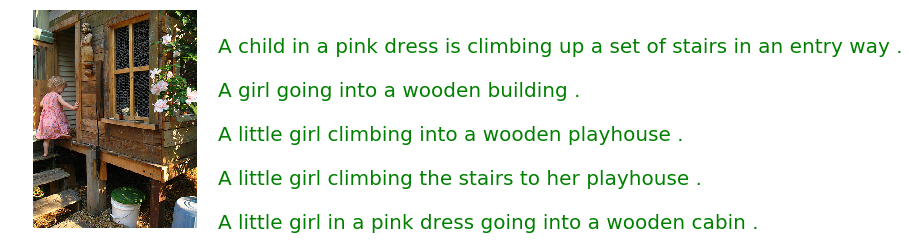

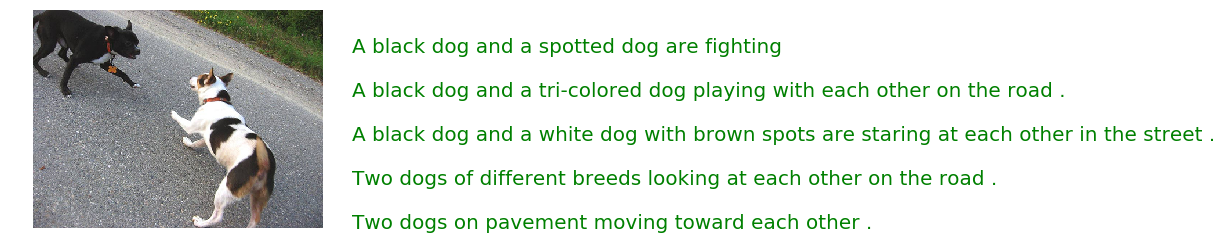

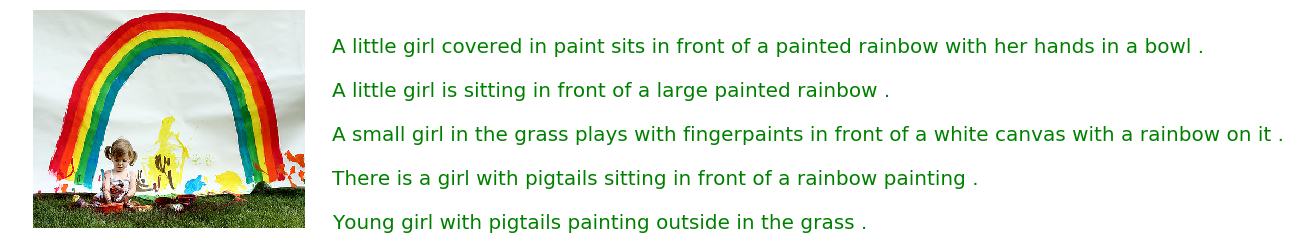

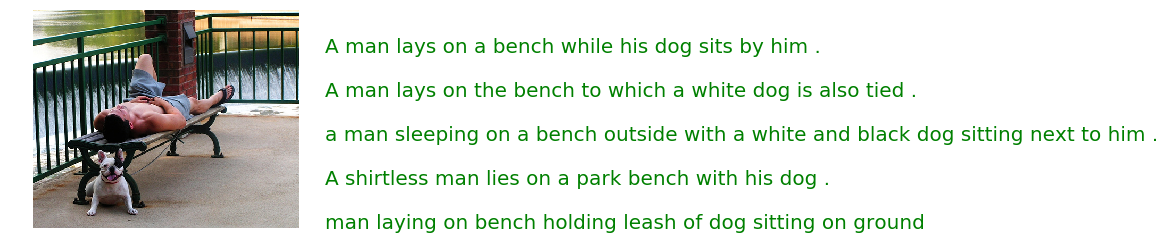

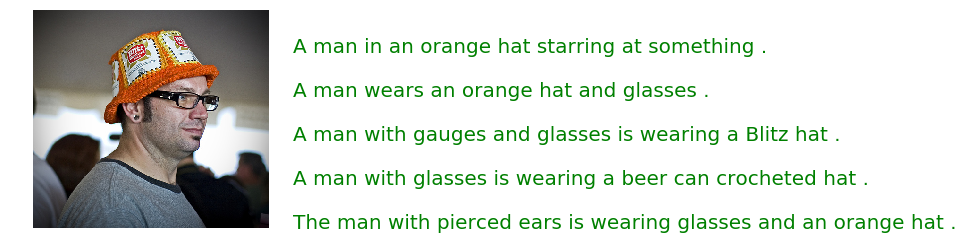

In [78]:
def run_caption_and_image_plotter_for_a_range(start,end,frame):
    for i in range(start,end):
        caption_and_image_plotter(frame.ID.drop_duplicates().iloc[i],frame)
run_caption_and_image_plotter_for_a_range(0,5,df)

**Preprocessing of captions**<BR>
    
- Create the tokenized vectors by tokenizing the captions fore ex :split them using spaces & other filters. This gives us a vocabulary of all of the unique words in the data. Keep the total vocaublary to top 5,000 words for saving memory.

- Replace all other words with the unknown token "UNK" .

- Create word-to-index and index-to-word mappings.

- Pad all sequences to be the same length as the longest one.

In [79]:
# create the tokenizer
top_word_cnt = 5000
tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=top_word_cnt,oov_token="<unk>",filters='!"#$%&()*+.,-/:;=?@[\]^_`{|}~ ')
tokenizer.fit_on_texts(annotations)
train_seqs = tokenizer.texts_to_sequences(annotations)

In [80]:
train_seqs[:5]

[[3, 2, 44, 5, 2, 91, 173, 8, 120, 52, 2, 394, 13, 395, 5, 29, 1, 671, 4],
 [3, 2, 20, 317, 65, 2, 197, 118, 4],
 [3, 2, 41, 20, 120, 65, 2, 197, 2438, 4],
 [3, 2, 41, 20, 120, 6, 395, 21, 61, 2438, 4],
 [3, 2, 41, 20, 5, 2, 91, 173, 317, 65, 2, 197, 2982, 4]]

In [81]:
# Create word-to-index and index-to-word mappings.
tokenizer.word_index['<pad>'] = 0
tokenizer.index_word[0] = '<pad>'
train_seqs = tokenizer.texts_to_sequences(annotations)

In [82]:
tokenizer.word_counts

OrderedDict([('<start>', 40455),
             ('a', 62992),
             ('child', 1545),
             ('in', 18986),
             ('pink', 739),
             ('dress', 348),
             ('is', 9345),
             ('climbing', 507),
             ('up', 1302),
             ('set', 109),
             ('of', 6723),
             ('stairs', 109),
             ('an', 2432),
             ('entry', 1),
             ('way', 53),
             ('<end>', 40455),
             ('girl', 3328),
             ('going', 149),
             ('into', 1074),
             ('wooden', 284),
             ('building', 510),
             ('little', 1768),
             ('playhouse', 6),
             ('the', 18419),
             ('to', 3176),
             ('her', 1178),
             ('cabin', 4),
             ('black', 3848),
             ('dog', 8138),
             ('and', 8862),
             ('spotted', 38),
             ('are', 3504),
             ('fighting', 133),
             ('tri', 14),
             ('color

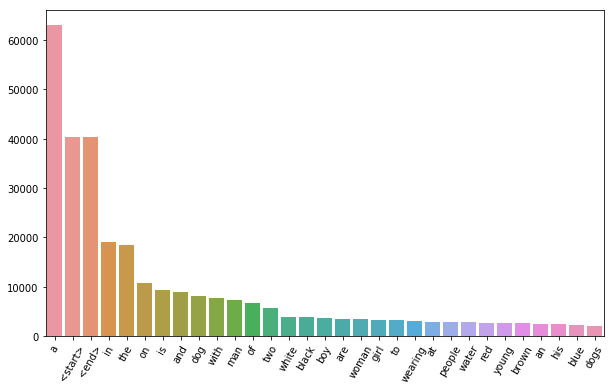

In [83]:
# Create a word count of your tokenizer to visulize the Top 30 occuring words after text processing
get_top_words_based_on_cnt(tokenizer.word_counts,30)

In [84]:
def min_max_for_nested_array(nested_array):
    array=[len(e) for e in nested_array]
    return min(array),max(array)
min_l,max_l=min_max_for_nested_array(train_seqs)

In [85]:
# Pad each vector to the max_length of the captions ^ store it to a vairable

cap_vector=tf.keras.preprocessing.sequence.pad_sequences(train_seqs,padding='post',maxlen=max_l)

print("The shape of Caption vector is :" + str(cap_vector.shape))

The shape of Caption vector is :(40455, 39)


**Pre-processing the images**

- Resize them into the shape of (299, 299)

- Normalize the image within the range of -1 to 1, such that it is in correct format for InceptionV3.

In [86]:
#Function to resize the image

def load_the_image(file_path):
    my_img = tf.io.read_file(file_path)
    my_img = tf.image.decode_jpeg(my_img, channels=3)
    my_img = tf.image.resize(my_img, (299, 299))
    my_img = tf.keras.applications.inception_v3.preprocess_input(my_img)
    return my_img,file_path

In [87]:
#Normalize the image set
encode_train_set = sorted(set(all_img_vector))
feature_dict = {}
image_data_set = tf.data.Dataset.from_tensor_slices(encode_train_set)
image_data_set = image_data_set.map(load_the_image, num_parallel_calls=tf.data.experimental.AUTOTUNE).batch(32)

In [88]:
print(image_data_set)

<BatchDataset shapes: ((None, 299, 299, 3), (None,)), types: (tf.float32, tf.string)>


###  train & test data

1.Combine both images & captions to create the train & test dataset using tf.data.Dataset API. Create the train-test spliit using 80-20 ratio & random state = 42

2.Make sure you have done Shuffle and batch while building the dataset

3.The shape of each image in the dataset after building should be (batch_size, 299, 299, 3)

4.The shape of each caption in the dataset after building should be(batch_size, max_len)

In [89]:
#write your code here
image_train, image_test, caption_train, caption_test = train_test_split(all_img_vector,
                                                                        cap_vector,
                                                                        test_size=0.2,
                                                                        random_state=33)

In [90]:
print("Training data for images: " + str(len(image_train)))
print("Testing data for images: " + str(len(image_test)))
print("Training data for Captions: " + str(len(caption_train)))
print("Testing data for Captions: " + str(len(caption_test)))

Training data for images: 32364
Testing data for images: 8091
Training data for Captions: 32364
Testing data for Captions: 8091


In [91]:
def map_function(image_name,capt):
    image_tensor = feature_dict[image_name.decode('utf-8')]
    return image_tensor,capt

**Load the pretrained Imagenet weights of Inception net V3**

1.To save the memory(RAM) from getting exhausted, extract the features of the image using the last layer of pre-trained model. Including this as part of training will lead to higher computational time.

2.The shape of the output of this layer is 8x8x2048.

3.Use a function to extract the features of each image in the train & test dataset such that the shape of each image should be (batch_size, 8*8, 2048)

In [92]:
#extract features using pretrained model
image_model = tf.keras.applications.InceptionV3(include_top=False,weights='imagenet')
new_input = image_model.input 
hidden_layer = image_model.layers[-1].output 
image_features_extract_model = keras.Model(new_input, hidden_layer)

In [93]:
# write your code to extract features from each image in the dataset
image_features_extract_model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, None, None,  0                                            
__________________________________________________________________________________________________
conv2d_94 (Conv2D)              (None, None, None, 3 864         input_2[0][0]                    
__________________________________________________________________________________________________
batch_normalization_94 (BatchNo (None, None, None, 3 96          conv2d_94[0][0]                  
__________________________________________________________________________________________________
activation_94 (Activation)      (None, None, None, 3 0           batch_normalization_94[0][0]     
____________________________________________________________________________________________

In [94]:
#Function to extract the features of each image in train,test sets
for image,path in tqdm(image_data_set):
    batch_features = image_features_extract_model(image)
    batch_features = tf.reshape(batch_features,(batch_features.shape[0], -1, batch_features.shape[3]))
    for batch_f, p in zip(batch_features, path):
        path_of_feature = p.numpy().decode("utf-8")
        feature_dict[path_of_feature] =  batch_f.numpy()

253it [00:45,  5.72it/s]


In [95]:
#size of tensor 8*8,2048
batch_f.shape

TensorShape([64, 2048])

#### Set parameters and functions to generate datasets for model building

In [96]:
BATCH_SIZE = 32
BUFFER_SIZE = 1000
def generate_dataset(images_data, captions_data):    
    dataset = tf.data.Dataset.from_tensor_slices((images_data, captions_data))
    dataset = dataset.shuffle(BUFFER_SIZE)
    dataset = dataset.map(lambda item1, item2: tf.numpy_function(
          map_function, [item1, item2], [tf.float32, tf.int32]),
          num_parallel_calls=tf.data.experimental.AUTOTUNE).batch(BATCH_SIZE)
    dataset = dataset.prefetch(buffer_size=tf.data.experimental.AUTOTUNE)
    return dataset

In [97]:
train_dataset=generate_dataset(image_train,caption_train)
test_dataset=generate_dataset(image_test,caption_test)

In [98]:
sample_img_batch, sample_cap_batch = next(iter(train_dataset))
print(sample_img_batch.shape)  #(batch_size, 8*8, 2048)
print(sample_cap_batch.shape) #(batch_size,40)

(32, 64, 2048)
(32, 39)


### Model Building

- Set the parameters
- Build the Encoder, Attention model & Decoder

In [99]:
embedding_dim = 256 
units = 512
vocab_size = 5001 #top 5,000 words +1
train_num_steps = len(image_train) // BATCH_SIZE
test_num_steps = len(image_test) // BATCH_SIZE

#### Encoder

In [100]:
class Encoder(Model):
    def __init__(self,embed_dim):
        super(Encoder, self).__init__()
        self.fc = layers.Dense(embed_dim)
        self.dropout = layers.Dropout(0.5)
        
    def call(self, features):
        features = self.fc(features)
        features = tf.nn.relu(features)
        return features

In [101]:
#create encoder
encoder=Encoder(embedding_dim)

#### Attention Model

In [102]:
class Attention_model(Model):
    def __init__(self, units):
        super(Attention_model, self).__init__()
        self.W1 = layers.Dense(units)
        self.W2 = layers.Dense(units)
        self.V = layers.Dense(1)
        self.units=units

    def call(self, features, hidden):
        hidden_with_time_axis =  tf.expand_dims(hidden, 1)
        score = keras.activations.tanh(self.W1(features) + self.W2(hidden_with_time_axis))
        attention_weights =  keras.activations.softmax(self.V(score), axis=1)
        context_vector = attention_weights * features
        context_vector = tf.reduce_sum(context_vector, axis=1)
        

        return context_vector, attention_weights

#### RNN Decoder

In [103]:
class RNN_Decoder(Model):
    def __init__(self, embedding_dim, units, vocab_size):

        super(RNN_Decoder, self).__init__()
        self.units = units

        self.embedding = layers.Embedding(vocab_size, embedding_dim)
        self.gru = layers.GRU(self.units,
                                   return_sequences=True,
                                   return_state=True,
                                   recurrent_initializer='glorot_uniform')
        
        self.fc1 = layers.Dense(self.units)
        self.fc2 = layers.Dense(vocab_size)

        self.attention = Attention_model(self.units)

    def call(self, x, features, hidden):
        # defining attention as a separate model
        context_vector, attention_weights = self.attention(features, hidden)
        # x shape after passing through embedding == (batch_size, 1, embedding_dim)
        x = self.embedding(x)
        # x shape after concatenation == (batch_size, 1, embedding_dim + hidden_size)
        x = tf.concat([tf.expand_dims(context_vector, 1), x], axis=-1)
        # passing the concatenated vector to the GRU
        output, state = self.gru(x)
        # shape == (batch_size, max_length, hidden_size)
        x = self.fc1(output)        
        # x shape == (batch_size * max_length, hidden_size)
        x = tf.reshape(x, (-1, x.shape[2]))
        # output shape == (batch_size * max_length, vocab)
        x = self.fc2(x)
        return x, state, attention_weights

    def init_state(self, batch_size):
        return tf.zeros((batch_size, self.units))


**Decoder**

In [104]:
class Decoder(Model):
    def __init__(self, embed_dim, units, vocab_size):
        super(Decoder, self).__init__()
        self.units=units
        self.attention = Attention_model(self.units)
        self.embed = layers.Embedding(vocab_size, embed_dim,mask_zero=False)
        self.gru = tf.keras.layers.GRU(self.units,return_sequences=True,return_state=True,recurrent_initializer='glorot_uniform')
        self.d1 = layers.Dense(self.units)
        self.d2 = layers.Dense(vocab_size)   
        self.dropout = Dropout(0.5)

    def call(self,x,features, hidden):
        context_vector, attention_weights = self.attention(features, hidden)
        embed = self.dropout(self.embed(x)) 
        mask = self.embed.compute_mask(x)
        embed =  tf.concat([tf.expand_dims(context_vector, 1), embed], axis=-1)
        output,state = self.gru(embed,mask=mask)
        output = self.d1(output)
        output = tf.reshape(output, (-1, output.shape[2])) 
        output = self.d2(output) 

        return output,state, attention_weights
    
    def init_state(self, batch_size):
        return tf.zeros((batch_size, self.units))

In [105]:
#create decoder
decoder=Decoder(embedding_dim, units, vocab_size)

In [106]:
features=encoder(sample_img_batch)

hidden = decoder.init_state(batch_size=sample_cap_batch.shape[0])
dec_input = tf.expand_dims([tokenizer.word_index['<start>']] * sample_cap_batch.shape[0], 1)

predictions, hidden_out, attention_weights= decoder(dec_input, features, hidden)
print('Feature shape from Encoder: {}'.format(features.shape)) 
print('Predcitions shape from Decoder: {}'.format(predictions.shape)) 
print('Attention weights shape from Decoder: {}'.format(attention_weights.shape))

Feature shape from Encoder: (32, 64, 256)
Predcitions shape from Decoder: (32, 5001)
Attention weights shape from Decoder: (32, 64, 1)


#### Model training,tuning & optimization

- Set the optimizer & loss object
- Create your checkpoint path
- Create your training & testing step functions
- Create your loss function for the test dataset

In [107]:
#set optimizer
optimizer = keras.optimizers.Adam()
loss_object = keras.losses.SparseCategoricalCrossentropy(from_logits=True, reduction='none')

In [108]:
#Define loss object
def loss_function(real, pred):
    mask = tf.math.logical_not(tf.math.equal(real, 0))
    loss_ = loss_object(real, pred)
    mask = tf.cast(mask, dtype=loss_.dtype)
    loss_ *= mask
    return tf.reduce_mean(loss_)

In [109]:
#create checkpoint path
checkpoint_path = ".\Flickr8k\File4"
ckpt = tf.train.Checkpoint(encoder=encoder,
                           decoder=decoder,
                           optimizer = optimizer)
ckpt_manager = tf.train.CheckpointManager(ckpt,
                                          checkpoint_path,
                                          max_to_keep=5)

In [110]:
start_epoch = 0
if ckpt_manager.latest_checkpoint:
    start_epoch = int(ckpt_manager.latest_checkpoint.split('-')[-1])

In [111]:
#Train step function
@tf.function
def train_step(img_tensor, target):
    loss = 0
    hidden = decoder.init_state(batch_size=target.shape[0])
    dec_input = tf.expand_dims([tokenizer.word_index['<start>']] * target.shape[0], 1)
    with tf.GradientTape() as tape:
        features = encoder(img_tensor)
        for i in range(1, target.shape[1]):
            predictions, hidden, _ = decoder(dec_input, features, hidden)
            loss += loss_function(target[:, i], predictions)
            dec_input = tf.expand_dims(target[:, i], 1)
        avg_loss = (loss/int(target.shape[1]))
        trainable_variables = encoder.trainable_variables + decoder.trainable_variables
        gradients = tape.gradient(loss, trainable_variables)
        optimizer.apply_gradients(zip(gradients, trainable_variables))
        return loss, avg_loss

In [112]:
#Test step function
@tf.function
def test_step(img_tensor, target):
    loss = 0
    hidden = decoder.init_state(batch_size=target.shape[0])
    dec_input = tf.expand_dims([tokenizer.word_index['<start>']] * target.shape[0], 1)

    with tf.GradientTape() as tape:
        features = encoder(img_tensor)

        for i in range(1, target.shape[1]):
            predictions, hidden, _ = decoder(dec_input, features, hidden)
            loss += loss_function(target[:, i], predictions)
            dec_input = tf.expand_dims(target[:, i], 1)

        avg_loss = (loss / int(target.shape[1]))

        trainable_variables = encoder.trainable_variables + decoder.trainable_variables
        gradients = tape.gradient(loss, trainable_variables)
        optimizer.apply_gradients(zip(gradients, trainable_variables))

        return loss, avg_loss

In [113]:
#loss function for test dataset
def test_loss_cal(test_dataset):
    total_loss = 0
    for (batch, (img_tensor, target)) in enumerate(test_dataset):
        batch_loss, t_loss = test_step(img_tensor, target)
        total_loss += t_loss
    avg_test_loss=total_loss/test_num_steps
    return avg_test_loss

In [114]:
loss_plot = []
test_loss_plot = []
EPOCHS = 15

best_test_loss=100
for epoch in tqdm(range(0, EPOCHS)):
    start = time.time()
    total_loss = 0
    for (batch, (img_tensor, target)) in enumerate(train_dataset):
        batch_loss, t_loss = train_step(img_tensor, target)
        total_loss += t_loss
        avg_train_loss=total_loss / train_num_steps
        
    loss_plot.append(avg_train_loss)    
    test_loss = test_loss_cal(test_dataset)
    test_loss_plot.append(test_loss)
    
    print ('For epoch: {}, the train loss is {:.3f}, & test loss is {:.3f}'.format(epoch+1,avg_train_loss,test_loss))
    print ('Time taken for 1 epoch {} sec\n'.format(time.time() - start))
    
    if test_loss < best_test_loss:
        print('Test loss has been reduced from %.3f to %.3f' % (best_test_loss, test_loss))
        best_test_loss = test_loss
        ckpt_manager.save()


  0%|          | 0/15 [00:00<?, ?it/s]

For epoch: 1, the train loss is 1.184, & test loss is 0.995
Time taken for 1 epoch 246.37958884239197 sec

Test loss has been reduced from 100.000 to 0.995


  7%|▋         | 1/15 [04:06<57:37, 246.98s/it]

For epoch: 2, the train loss is 0.933, & test loss is 0.886
Time taken for 1 epoch 132.07979321479797 sec

Test loss has been reduced from 0.995 to 0.886


 13%|█▎        | 2/15 [06:19<46:04, 212.66s/it]

For epoch: 3, the train loss is 0.853, & test loss is 0.819
Time taken for 1 epoch 131.45253825187683 sec

Test loss has been reduced from 0.886 to 0.819


 20%|██        | 3/15 [08:31<37:41, 188.46s/it]

For epoch: 4, the train loss is 0.794, & test loss is 0.766
Time taken for 1 epoch 131.81593942642212 sec

Test loss has been reduced from 0.819 to 0.766


 27%|██▋       | 4/15 [10:43<31:27, 171.63s/it]

For epoch: 5, the train loss is 0.746, & test loss is 0.722
Time taken for 1 epoch 131.55557084083557 sec

Test loss has been reduced from 0.766 to 0.722


 33%|███▎      | 5/15 [12:55<26:37, 159.76s/it]

For epoch: 6, the train loss is 0.703, & test loss is 0.683
Time taken for 1 epoch 131.82446217536926 sec

Test loss has been reduced from 0.722 to 0.683


 40%|████      | 6/15 [15:08<22:43, 151.54s/it]

For epoch: 7, the train loss is 0.664, & test loss is 0.645
Time taken for 1 epoch 131.49648237228394 sec

Test loss has been reduced from 0.683 to 0.645


 47%|████▋     | 7/15 [17:20<19:25, 145.68s/it]

For epoch: 8, the train loss is 0.628, & test loss is 0.612
Time taken for 1 epoch 131.87368202209473 sec

Test loss has been reduced from 0.645 to 0.612


 53%|█████▎    | 8/15 [19:32<16:31, 141.71s/it]

For epoch: 9, the train loss is 0.597, & test loss is 0.583
Time taken for 1 epoch 131.40717220306396 sec

Test loss has been reduced from 0.612 to 0.583


 60%|██████    | 9/15 [21:44<13:52, 138.79s/it]

For epoch: 10, the train loss is 0.566, & test loss is 0.553
Time taken for 1 epoch 131.73160910606384 sec

Test loss has been reduced from 0.583 to 0.553


 67%|██████▋   | 10/15 [23:57<11:24, 136.83s/it]

For epoch: 11, the train loss is 0.540, & test loss is 0.529
Time taken for 1 epoch 131.48954582214355 sec

Test loss has been reduced from 0.553 to 0.529


 73%|███████▎  | 11/15 [26:09<09:01, 135.39s/it]

For epoch: 12, the train loss is 0.515, & test loss is 0.506
Time taken for 1 epoch 131.5832486152649 sec

Test loss has been reduced from 0.529 to 0.506


 80%|████████  | 12/15 [28:21<06:43, 134.40s/it]

For epoch: 13, the train loss is 0.491, & test loss is 0.484
Time taken for 1 epoch 131.58020186424255 sec

Test loss has been reduced from 0.506 to 0.484


 87%|████████▋ | 13/15 [30:33<04:27, 133.72s/it]

For epoch: 14, the train loss is 0.470, & test loss is 0.463
Time taken for 1 epoch 131.62512874603271 sec

Test loss has been reduced from 0.484 to 0.463


 93%|█████████▎| 14/15 [32:45<02:13, 133.25s/it]

For epoch: 15, the train loss is 0.451, & test loss is 0.445
Time taken for 1 epoch 131.32213068008423 sec

Test loss has been reduced from 0.463 to 0.445


100%|██████████| 15/15 [34:57<00:00, 132.83s/it]


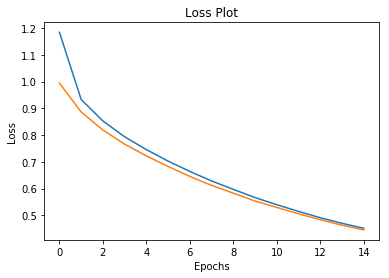

In [115]:
plt.plot(loss_plot)
plt.plot(test_loss_plot)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Plot')
plt.show()

### Model Evaluation

- Define your evaluation function using greedy search
- Define your evaluation function using beam search ( optional)
- Test it on a sample data using BLEU score

In [116]:
#Function to evaluate using greedy search
def evaluate(image):
    max_length=max_l
    attention_plot = np.zeros((max_length, attention_features_shape))

    hidden = decoder.init_state(batch_size=1)

    temp_input = tf.expand_dims(load_the_image(image)[0], 0) #process the input image to desired format before extracting features
    img_tensor_val = image_features_extract_model(temp_input)
    img_tensor_val = tf.reshape(img_tensor_val, (img_tensor_val.shape[0], -1, img_tensor_val.shape[3]))

    features = encoder(img_tensor_val)

    dec_input = tf.expand_dims([tokenizer.word_index['<start>']], 0)
    result = []

    for i in range(max_length):
        predictions, hidden, attention_weights = decoder(dec_input, features, hidden)

        attention_plot[i] = tf.reshape(attention_weights, (-1, )).numpy()

        predicted_id = tf.argmax(predictions[0]).numpy()
        result.append(tokenizer.index_word[predicted_id])

        if tokenizer.index_word[predicted_id] == '<end>':
            return result, attention_plot,predictions

        dec_input = tf.expand_dims([predicted_id], 0)

    attention_plot = attention_plot[:len(result), :]
    return result, attention_plot,predictions


In [117]:
#Function to evaluate the model using beam search
def beam_evaluate(image, beam_index = 3):
    max_length=max_l
    start = [tokenizer.word_index['<start>']]
    result = [[start, 0.0]]

    attention_plot = np.zeros((max_length, attention_features_shape))

    hidden = decoder.init_state(batch_size=1)

    temp_input = tf.expand_dims(load_the_image(image)[0], 0)
    img_tensor_val = image_features_extract_model(temp_input)
    img_tensor_val = tf.reshape(img_tensor_val, (img_tensor_val.shape[0], -1, img_tensor_val.shape[3]))

    features = encoder(img_tensor_val)

    dec_input = tf.expand_dims([tokenizer.word_index['<start>']], 0)

    while len(result[0][0]) < max_length:
        i=0
        temp = []
        for s in result:
            predictions, hidden, attention_weights = decoder(dec_input, features, hidden)
            attention_plot[i] = tf.reshape(attention_weights, (-1, )).numpy()
            i=i+1
            word_preds = np.argsort(predictions[0])[-beam_index:]
          
            for w in word_preds:
                next_cap, prob = s[0][:], s[1]
                next_cap.append(w)
            
                prob += np.log(predictions[0][w])
                    
                temp.append([next_cap, prob])
        result = temp
        result = sorted(result, reverse=False, key=lambda l: l[1])
        result = result[-beam_index:]
        
        
        predicted_id = result[-1]
        pred_list = predicted_id[0]
        
        prd_id = pred_list[-1] 
        if(prd_id!=3):
            dec_input = tf.expand_dims([prd_id], 0)  
        else:
            break
    
    
    result2 = result[-1][0]
    
    intermediate_caption = [tokenizer.index_word[i] for i in result2]
    final_caption = []
    for i in intermediate_caption:
        if i != '<end>':
            final_caption.append(i)
            
        else:
            break

    attention_plot = attention_plot[:len(result), :]
    final_caption = ' '.join(final_caption[1:])
    return final_caption

In [118]:
def plot_attmap(caption, weights, image):

    fig = plt.figure(figsize=(10, 10))
    temp_img = np.array(Image.open(image))
    
    len_cap = len(caption)
    for cap in range(len_cap):
        weights_img = np.reshape(weights[cap], (8,8))
        weights_img = np.array(Image.fromarray(weights_img).resize((224, 224), Image.LANCZOS))
        
        ax = fig.add_subplot(len_cap//2, len_cap//2, cap+1)
        ax.set_title(caption[cap], fontsize=15)
        
        img=ax.imshow(temp_img)
        
        ax.imshow(weights_img, cmap='gist_heat', alpha=0.6,extent=img.get_extent())
        ax.axis('off')
    plt.subplots_adjust(hspace=0.2, wspace=0.2)
    plt.show()

In [119]:
from nltk.translate.bleu_score import sentence_bleu

In [120]:
def filt_text(text):
    filt=['<start>','<unk>','<end>'] 
    temp= text.split()
    [temp.remove(j) for k in filt for j in temp if k==j]
    text=' '.join(temp)
    return text

In [121]:
features_shape = batch_f.shape[1]
attention_features_shape = batch_f.shape[0]

3117
BELU score: 9.073649206312902e-153
Real Caption: jumping a bicycle onto a park bench
Prediction Caption: a man jumps onto a bicycle


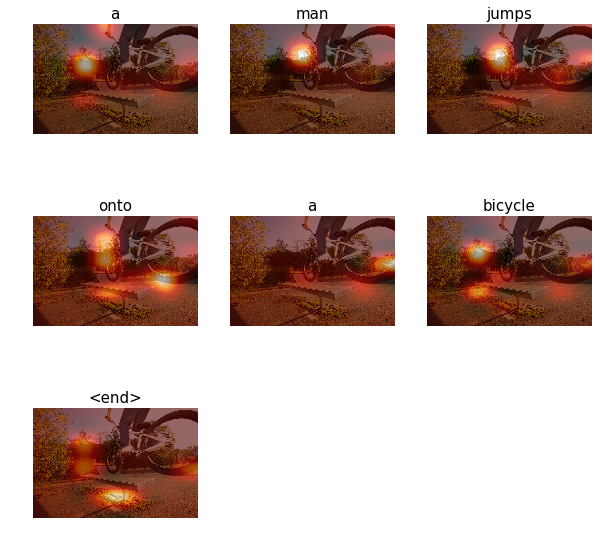

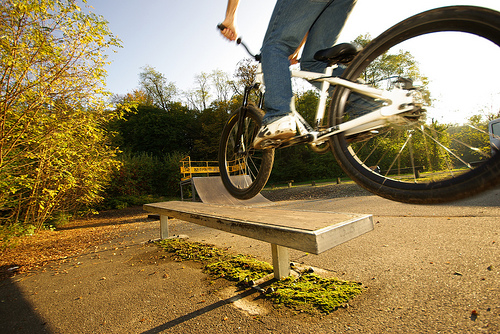

In [122]:
rid = np.random.randint(0, len(image_test))
print(rid)
test_image = image_test[rid]

real_caption = ' '.join([tokenizer.index_word[i] for i in caption_test[rid] if i not in [0]])
result, attention_plot,pred_test = evaluate(test_image)


real_caption=filt_text(real_caption)      


pred_caption=' '.join(result).rsplit(' ', 1)[0]

real_appn = []
real_appn.append(real_caption.split())
reference = real_appn
candidate = pred_caption.split()

score = sentence_bleu(reference, candidate, weights=(0.25, 0.25, 0.25, 0.25))
print(f"BELU score: {score*100}")

print('Real Caption:', real_caption)
print('Prediction Caption:', pred_caption)
plot_attmap(result, attention_plot, test_image)


Image.open(test_image)

In [123]:
captions=beam_evaluate(test_image)
print(pred_caption)

a man jumps onto a bicycle


#### Converting Text to Speech¶

- use gTTS module to convert a caption to speech
- create speech in mp3 format in local directory for the test image used to predict the caption 

In [124]:
#Install gTTS 
! pip install gTTS

In [125]:
# Import the required module for text to speech conversion
from gtts import gTTS

# Language in which you want to convert
language = 'en'
  
# Passing the text and language to the engine, 
myobj = gTTS(text=pred_caption, lang=language, slow=False)
  
# Saving the converted audio in a mp3 file named
myobj.save("Predicted_text.mp3")
  
# Playing the converted file
os.system("mpg123 "+".\Predicted_text.mp3")

32512

In [126]:
#Testing the audio generated from predicted text using audio controls
from IPython.core.display import display,HTML
def show_audio_with_controls(file_path):
    display(HTML("<audio controls><source src={} type='audio/mp3'></audio>".format(file_path)))
    
show_audio_with_controls(".\Predicted_text.mp3")